In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [45]:
oscar_df = pd.read_csv('BigML_Dataset_5f50a62c2fb31c516d000176.csv')
oscar_df.head()

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,...,0,NaN,0,NaN,0,NaN,2005.0,7.0,8.0,5.0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,...,0,NaN,0,NaN,0,NaN,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,tt0120737,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,...,0,NaN,1,Best Music,2,Best Music|Best Production Design,2001.0,12.0,19.0,3.0


In [46]:
#Separando e limpando colunas utilizadas no KMeans:
#Foram escolhidos as notas do IMDb e o Metascore para visualizar a recepção pública e crítica de cada filme indicado.
oscar_df_corte = oscar_df.reindex(columns=['rate', 'metascore'])
oscar_df_corte = oscar_df_corte.dropna()
oscar_df_corte.head()

,rate,metascore
0,6.4,44.0
1,7.0,88.0
2,5.7,40.0
3,7.4,61.0
4,8.8,92.0


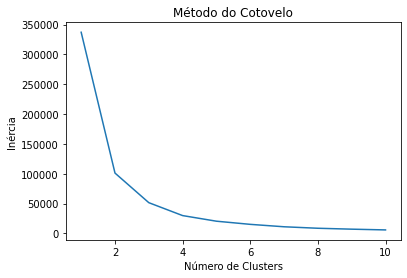

In [47]:
#Método do Cotovelo:

inercia = []

for i in range(1, 11):
    kmeans_oscar = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans_oscar.fit(oscar_df_corte)
    inercia.append(kmeans_oscar.inertia_)

plt.plot(range(1, 11), inercia)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

In [48]:
#Dois pareceu o número mais apropriado no gráfico, logo:
kmeans_oscar = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
clusters = kmeans_oscar.fit_predict(oscar_df_corte)
clusters

array([1, 0, 1, ..., 1, 1, 0])

In [49]:
#Dataframe com o cluster.
oscar_df_corte['cluster'] = clusters
oscar_df_corte.head()

,rate,metascore,cluster
0,6.4,44.0,1
1,7.0,88.0,0
2,5.7,40.0,1
3,7.4,61.0,1
4,8.8,92.0,0


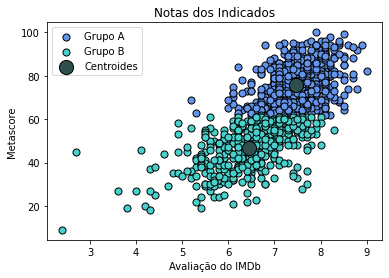

In [52]:
#Plot do gráfico:
x = oscar_df_corte.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='cornflowerblue',
    edgecolor='black',
    label='Grupo A'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='mediumturquoise',
    edgecolor='black',
    label='Grupo B'
)

plt.scatter(
    kmeans_oscar.cluster_centers_[:, 0], kmeans_oscar.cluster_centers_[:, 1],
    s=200, c='darkslategrey', edgecolor='black',
    label='Centroides'
)

plt.title("Notas dos Indicados")
plt.xlabel("Avaliação do IMDb")
plt.ylabel("Metascore")

plt.legend()
plt.show()